## Importujeme potrebné balíky

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Import dát

In [2]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

## Definovanie kľúčových dátumov

In [4]:
# Začiatočný dátum
start_date = "2009-04-05" 

# Prvá oficiálna informácia - 49.9%
ann_1 = "2009-12-09" 

# Druhá oficiálna informácia - 51.1%
ann_2 = "2012-07-05" 

# Dátum konca analýzy - koniec roku 2017
end_date = "2019-12-31"

# Dieselgate
d_gate = '2015-09-20' 

## Predpríprava dát

In [5]:
# Extrakcia zatváracích cien
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Vytvorenie výnosov - returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Vytvorenie výnosov na druhú
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extrakcia objem predaja (volume)
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [6]:
# Vyplnenie prázdnych metódov "BFILL"
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [7]:
# Mazanie nepotrebných stĺpcov
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Zobrazenie cien akcií

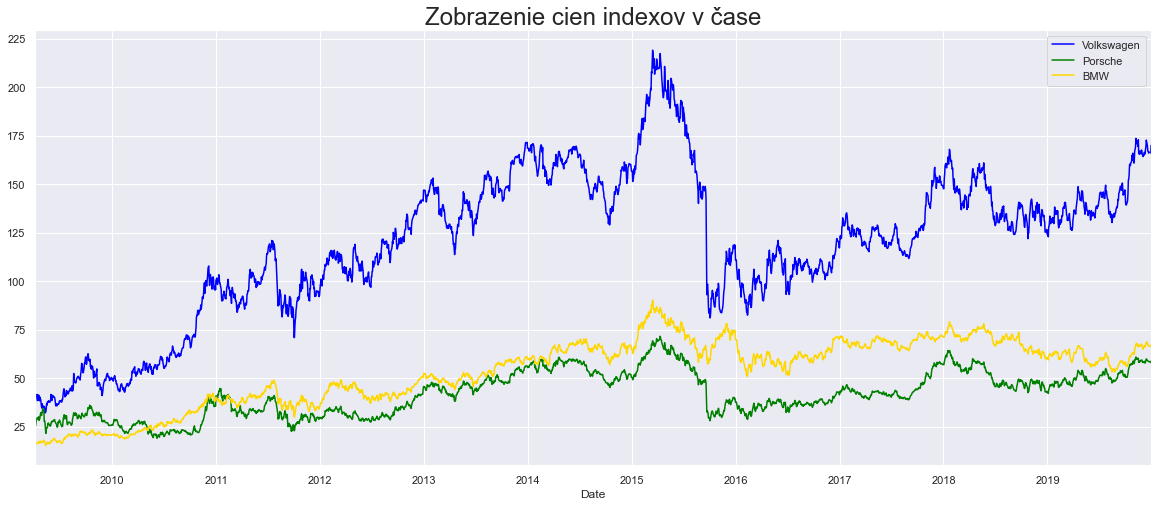

In [8]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.legend(['Volkswagen','Porsche','BMW'])
plt.title("Zobrazenie cien indexov v čase", size = 24)
plt.show()

## Zobrazenie cien akcií detailnejšie

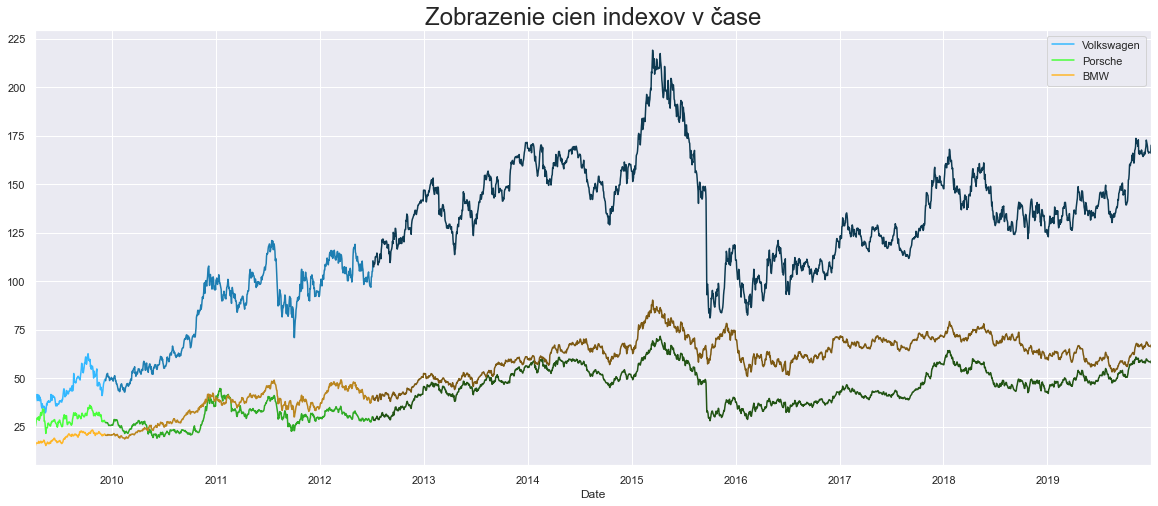

In [9]:
# Odtiene modrej 
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

# Odtiene zelenej 
df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

# Odtiene žltej 
df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])
plt.title("Zobrazenie cien indexov v čase", size = 24)
plt.show()

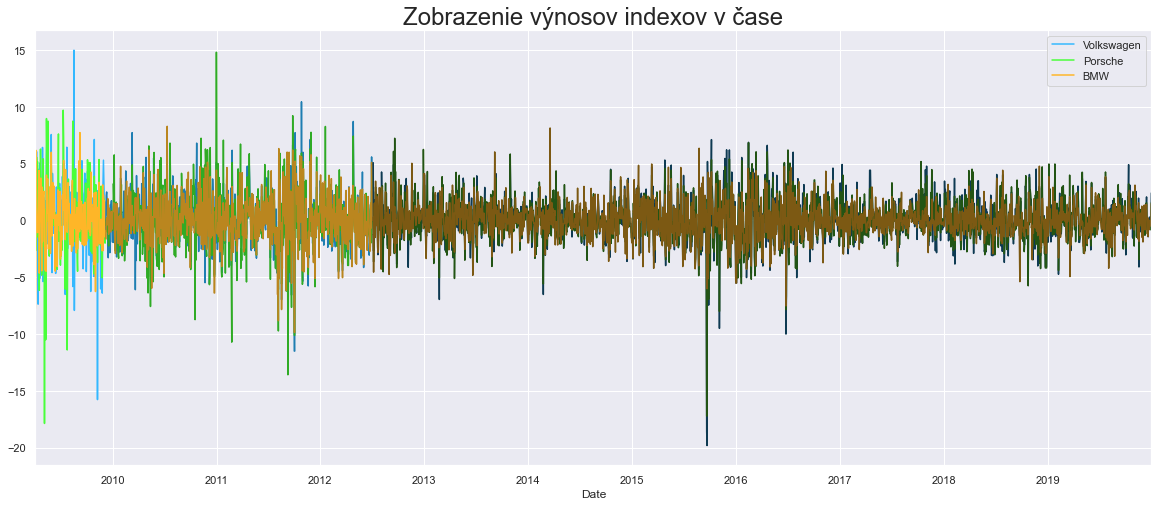

In [10]:
# Odtiene modrej 
df['ret_vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['ret_por'][start_date:ann_1].plot(color = "#49FF3A")
df['ret_bmw'][start_date:ann_1].plot(color = "#FEB628")

# Odtiene zelenej 
df['ret_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['ret_por'][ann_1:ann_2].plot(color = "#2FAB25")
df['ret_bmw'][ann_1:ann_2].plot(color = "#BA861F")


# Odtiene žltej 
df['ret_vol'][ann_2:end_date].plot(color = "#0E3A52")
df['ret_por'][ann_2:end_date].plot(color = "#225414")
df['ret_bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])
plt.title("Zobrazenie výnosov indexov v čase", size = 24)

plt.show()

## Korelácia

In [11]:
print('Korelácia medzi výrobcami od ' + str(start_date) + ' do ' + str(end_date)+ '\n')
print('Volkswagen & Porsche korelácia: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen & BMW korelácia: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche & BMW korelácia: \t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Korelácia medzi výrobcami od 2009-04-05 do 2019-12-31

Volkswagen & Porsche korelácia: 	0.9235844254712855
Volkswagen & BMW korelácia: 	0.8412359555104335
Porsche & BMW korelácia: 	0.8051006163576837


In [12]:
print('Korelácia medzi výrobcami od ' + str(start_date) + ' do ' + str(ann_1)+ '\n')
print('Volkswagen & Porsche korelácia: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen & BMW korelácia: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche & BMW korelácia: \t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Korelácia medzi výrobcami od 2009-04-05 do 2009-12-09

Volkswagen & Porsche korelácia: 	0.6633584754006449
Volkswagen & BMW korelácia: 	0.8427607438983815
Porsche & BMW korelácia: 	0.6095039657799249


In [13]:
print('Korelácia medzi výrobcami od ' + str(ann_1) + ' do ' + str(ann_2)+ '\n')
print('Volkswagen & Porsche korelácia: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen & BMW korelácia: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche & BMW korelácia: \t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Korelácia medzi výrobcami od 2009-12-09 do 2012-07-05

Volkswagen & Porsche korelácia: 	0.7428267981019064
Volkswagen & BMW korelácia: 	0.9795943009631584
Porsche & BMW korelácia: 	0.7042723353826524


In [14]:
print('Korelácia medzi výrobcami od ' + str(ann_2) + ' do ' + str(end_date)+ '\n')
print('Volkswagen & Porsche korelácia: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen & BMW korelácia: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche & BMW korelácia:  \t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Korelácia medzi výrobcami od 2012-07-05 do 2019-12-31

Volkswagen & Porsche korelácia: 	0.935701384880626
Volkswagen & BMW korelácia: 	0.41153243819127994
Porsche & BMW korelácia:  	0.564279111061023


## Najlepšie modely pre jednotlivé spoločnosti

### Pre Volkswagen

In [15]:
mod_vol_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_vol_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_vol_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)

In [16]:
mod_vol_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -322.988
Date:                Mon, 02 May 2022   AIC                            655.976
Time:                        18:15:32   BIC                            671.885
Sample:                    04-06-2009   HQIC                           662.427
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7232      0.447      1.618      0.106      -0.153       1.599
por            0.4000      0.096      4.168      0.000       0.212       0.588
bmw            0.6919      0.328      2.107      0.035       0.048       1.335
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         2.1737      0.148     14.718      0.000       1.884       2.463
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
mod_vol_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1080.051
Date:                Mon, 02 May 2022   AIC                           2166.103
Time:                        18:15:32   BIC                           2179.629
Sample:                    12-09-2009   HQIC                          2171.341
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7908      0.062     12.842      0.000       0.670       0.912
bmw            1.5487      0.073     21.268      0.000       1.406       1.691
sigma2         1.4643      0.060     24.532      0.000       1.347       1.581
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               112.42
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
mod_vol_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1954
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2872.295
Date:                Mon, 02 May 2022   AIC                           5754.589
Time:                        18:15:32   BIC                           5782.475
Sample:                    07-05-2012   HQIC                          5764.840
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            2.3421      0.018    133.448      0.000       2.308       2.376
bmw            0.4293      0.027     15.625      0.000       0.375       0.483
ar.L1          0.8369      0.089      9.451      0.000       0.663       1.010
ma.L1         -0.8704      0.080    -10.834      0.000      -1.028      -0.713
sigma2         1.1091      0.024     46.272      0.000       1.062       1.156
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               830.01
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Pre Porsche

In [19]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)

In [20]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -225.800
Date:                Mon, 02 May 2022   AIC                            463.601
Time:                        18:16:46   BIC                            482.692
Sample:                    04-06-2009   HQIC                           471.343
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5755      0.375      1.533      0.125      -0.160       1.311
vol            0.1150      0.053      2.157      0.031       0.011       0.219
bmw            0.8819      0.159      5.558      0.000       0.571       1.193
ar.L1          1.0748      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.7319      0.052     14.098      0.000       0.630       0.834
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               559.41
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -580.933
Date:                Mon, 02 May 2022   AIC                           1171.866
Time:                        18:16:46   BIC                           1194.410
Sample:                    12-09-2009   HQIC                          1180.598
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1785      0.016     11.134      0.000       0.147       0.210
bmw            0.3317      0.046      7.200      0.000       0.241       0.422
ar.L1          0.6585      0.230      2.860      0.004       0.207       1.110
ma.L1         -0.5898      0.246     -2.394      0.017      -1.073      -0.107
sigma2         0.3308      0.010     32.415      0.000       0.311       0.351
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1076.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1954
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood                -740.534
Date:                           Mon, 02 May 2022   AIC                           1491.067
Time:                                   18:16:46   BIC                           1518.953
Sample:                               07-05-2012   HQIC                          1501.319
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2639      0.003     82.429      0.000       0.258       0.270
bmw            0.1320      0.010     13.533      0.000       0.113       0.151
ma.L1         -0.0761      0.021     -3.576      0.000      -0.118      -0.034
ma.S.L5       -0.0409      0.023     -1.817      0.069      -0.085       0.003
sigma2         0.1250      0.002     52.038      0.000       0.120       0.130
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1166.87
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Pre automobilku Porsche

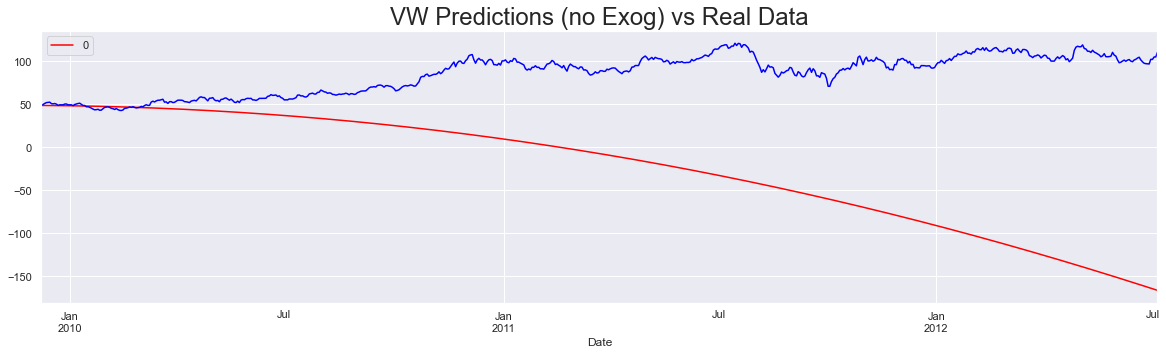

In [23]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

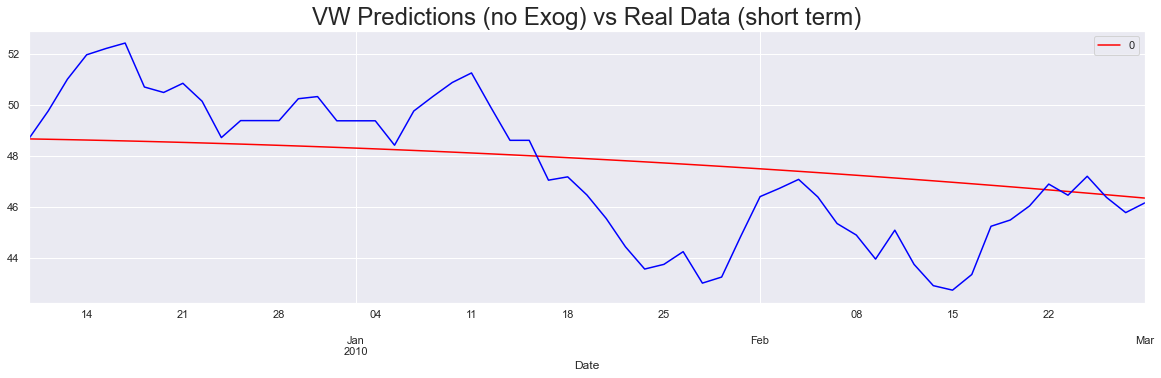

In [24]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

## Predikcia budúcnosti

### Pre automobilku Volkswagen

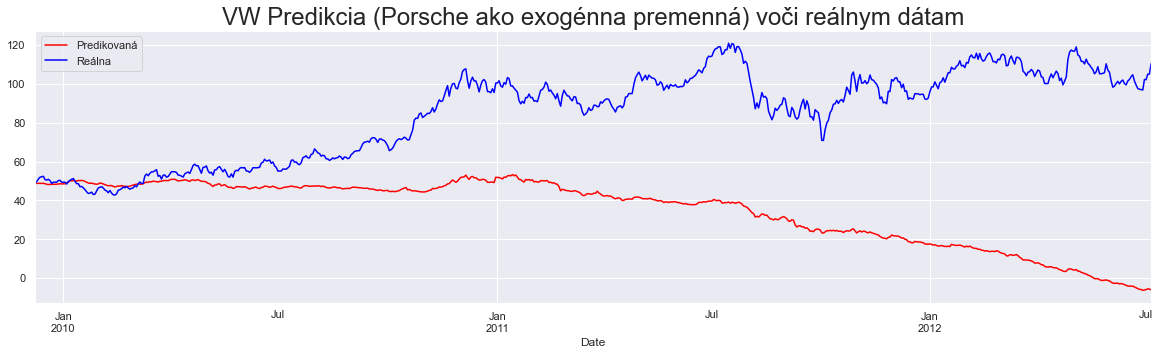

In [25]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# vykreslovaľnie grafu
df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predikcia (Porsche ako exogénna premenná) voči reálnym dátam", size = 24)
plt.legend(['Predikovaná', 'Reálna'])
plt.show()

In [26]:
model_auto_pred_pr.summary() #sumarizácia moswlu 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -323.448
Date:                Mon, 02 May 2022   AIC                            654.896
Time:                        18:16:56   BIC                            667.600
Sample:                    04-06-2009   HQIC                           660.048
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0964      0.243      0.397      0.691      -0.380       0.572
drift         -0.0004      0.002     -0.153      0.879      -0.005       0.004
por            0.5300      0.074      7.167      0.000       0.385       0.675
sigma2         2.2635      0.145     15.638      0.000       1.980       2.547
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):               205.81
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.70
Prob(H) (two-sided):                  0.10   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

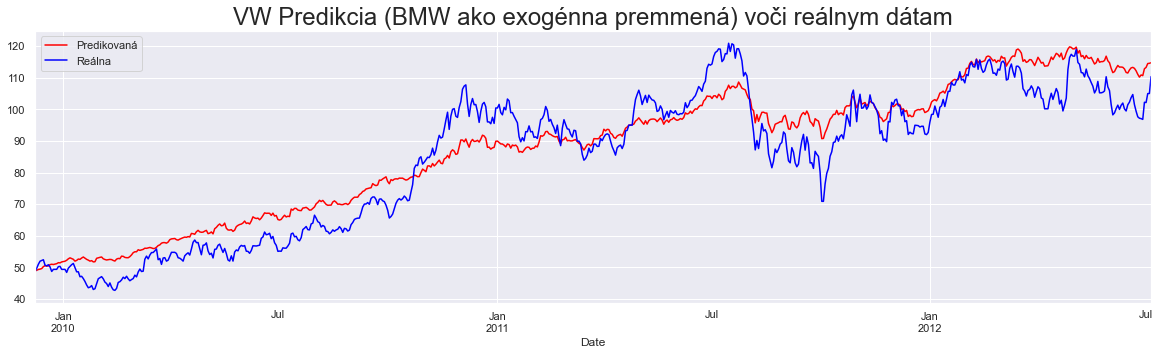

In [27]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                                m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),         
                               exogenous = df[['bmw']][ann_1:ann_2]), index = df[ann_1:ann_2].index)

# vykreslovaľnie grafu
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")
df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predikcia (BMW ako exogénna premmená) voči reálnym dátam", size = 24)
plt.legend(['Predikovaná', 'Reálna'])
plt.show()

In [28]:
model_auto_pred_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -326.613
Date:                Mon, 02 May 2022   AIC                            663.225
Time:                        18:17:04   BIC                            679.134
Sample:                    04-06-2009   HQIC                           669.677
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1840      0.600      1.973      0.049       0.008       2.360
drift          0.0039      0.003      1.243      0.214      -0.002       0.010
bmw            1.1053      0.300      3.687      0.000       0.518       1.693
ar.L1          0.9367      0.027     34.739      0.000       0.884       0.990
sigma2         2.2714      0.144     15.772      0.000       1.989       2.554
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               208.48
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

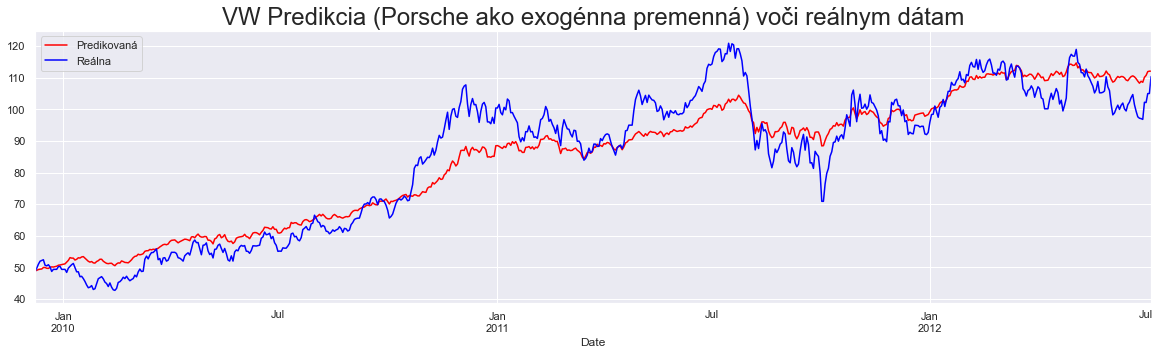

In [29]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# vykreslovaľnie grafu
df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predikcia (Porsche ako exogénna premenná) voči reálnym dátam", size = 24)
plt.legend(['Predikovaná', 'Reálna'])
plt.show()

In [30]:
model_auto_pred_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -321.044
Date:                Mon, 02 May 2022   AIC                            654.088
Time:                        18:17:12   BIC                            673.179
Sample:                    04-06-2009   HQIC                           661.830
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9969      0.516      1.930      0.054      -0.015       2.009
drift          0.0047      0.003      1.410      0.159      -0.002       0.011
por            0.4204      0.097      4.339      0.000       0.230       0.610
bmw            0.6308      0.333      1.895      0.058      -0.022       1.283
ar.L1          0.9333      0.029     32.444      0.000       0.877       0.990
sigma2         2.1310      0.143     14.894      0.000       1.851       2.411
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               190.25
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""